In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
# sampling coin tosses from a true distribution where p(H) = 0.7
random_result = []
num_coin_tosses = 100
for i in range(num_coin_tosses):
    sc = random.random()
    if sc < 0.7:
        random_result.append("H")
    else:
        random_result.append("T")

In [3]:
def get_heads_probabs_from_outcomes(outcomes):
    probabs_H_y = []
    probabs_T_y = []
    num_tosses_x = []
    num_coin_tosses = len(outcomes)

    for num_tosses in range(5, num_coin_tosses + 5, 5):
        outcomes_sofar = outcomes[:num_tosses]
        num_H = sum([1 for i in outcomes_sofar if (i == "H")])
        num_T = sum([1 for i in outcomes_sofar if (i == "T")])
        prob_H = num_H / float(num_H + num_T)
        probabs_H_y.append(prob_H)
        prob_T = num_T / float(num_H + num_T)
        probabs_T_y.append(prob_T)
        num_tosses_x.append(num_tosses)

    return num_tosses_x, probabs_H_y

In [4]:
import pickle

with open("./results/simple_results.pkl", "rb") as f:
    simple = pickle.load(f)

with open("./results/simple_emotion_results.pkl", "rb") as f:
    simple_emotion = pickle.load(f)


with open("./results/simulate_results.pkl", "rb") as f:
    simulate = pickle.load(f)

with open("./results/simulate_emotion_results.pkl", "rb") as f:
    simulate_emotion = pickle.load(f)

Text(42.722222222222214, 0.5, 'Fraction of tosses that were Heads')

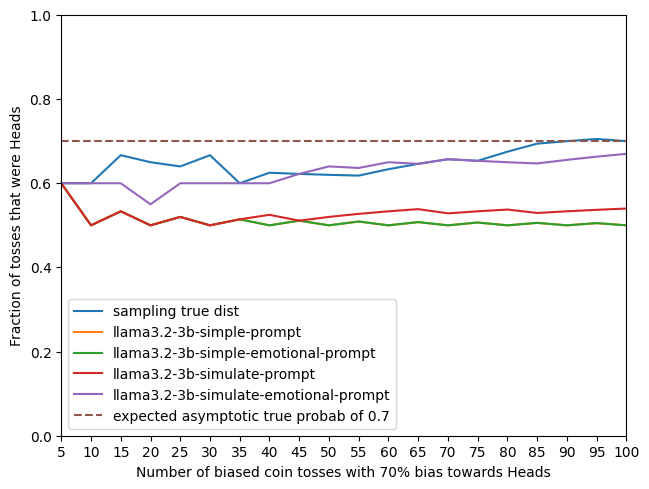

In [5]:
plt.plot(*get_heads_probabs_from_outcomes(random_result), label="sampling true dist")

plt.plot(*get_heads_probabs_from_outcomes(simple[0]), label="llama3.2-3b-simple-prompt")
plt.plot(
    *get_heads_probabs_from_outcomes(simple_emotion[0]),
    label="llama3.2-3b-simple-emotional-prompt"
)

plt.plot(
    *get_heads_probabs_from_outcomes(simulate[0]), label="llama3.2-3b-simulate-prompt"
)
plt.plot(
    *get_heads_probabs_from_outcomes(simulate_emotion[0]),
    label="llama3.2-3b-simulate-emotional-prompt"
)

plt.plot(
    list(range(5, 105, 5)),
    [0.7] * len(list(range(5, 105, 5))),
    label="expected asymptotic true probab of 0.7",
    linestyle="--",
)

plt.legend()
plt.ylim(0, 1)
plt.xlim(5, 100)
plt.tight_layout()
plt.xticks(list(range(5, 105, 5)))
plt.xlabel("Number of biased coin tosses with 70% bias towards Heads")
plt.ylabel("Fraction of tosses that were Heads")

In [6]:
import numpy as np


def normalize_heads_tails_probab(outcomes):
    probab_H = np.array(outcomes[1])
    probab_T = np.array(outcomes[2])
    probab_H = probab_H / (probab_H + probab_T).astype(float)
    return probab_H

Text(42.722222222222214, 0.5, "LLM Model Output Probab for Token being 'H' for Heads")

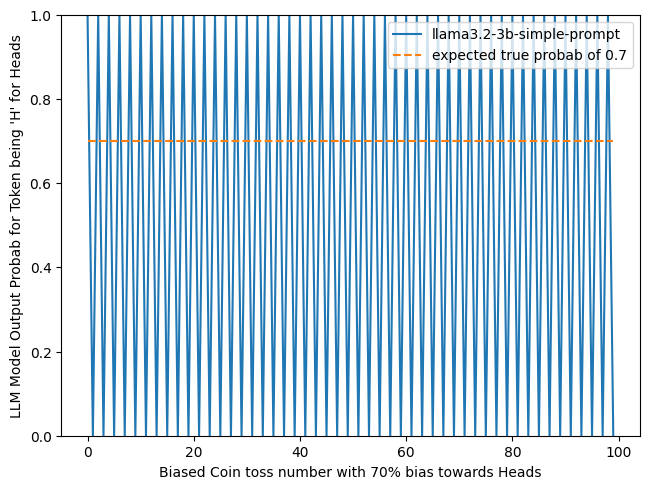

In [7]:
plt.plot(
    list(range(100)),
    normalize_heads_tails_probab(simple),
    label="llama3.2-3b-simple-prompt",
)

plt.plot(
    list(range(100)),
    [0.7] * len(list(range(100))),
    label="expected true probab of 0.7",
    linestyle="--",
)

plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.xlabel("Biased Coin toss number with 70% bias towards Heads")
plt.ylabel("LLM Model Output Probab for Token being 'H' for Heads")

Text(42.722222222222214, 0.5, "LLM Model Output Probab for Token being 'H' for Heads")

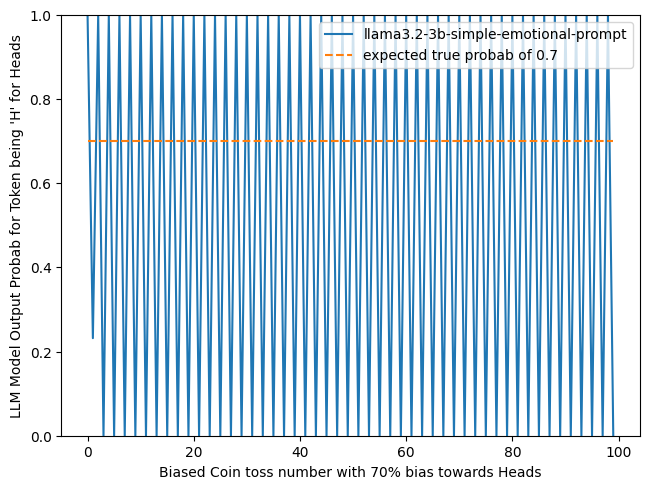

In [8]:
plt.plot(
    list(range(100)),
    normalize_heads_tails_probab(simple_emotion),
    label="llama3.2-3b-simple-emotional-prompt",
)

plt.plot(
    list(range(100)),
    [0.7] * len(list(range(100))),
    label="expected true probab of 0.7",
    linestyle="--",
)

plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.xlabel("Biased Coin toss number with 70% bias towards Heads")
plt.ylabel("LLM Model Output Probab for Token being 'H' for Heads")

Text(42.722222222222214, 0.5, "LLM Model Output Probab for Token being 'H' for Heads")

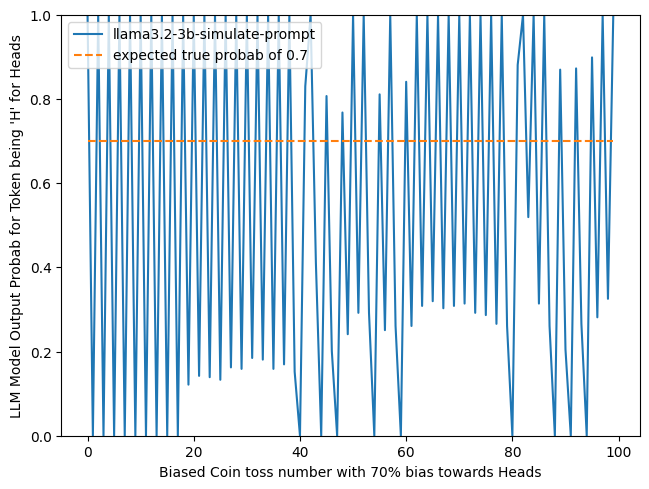

In [9]:
plt.plot(
    list(range(100)),
    normalize_heads_tails_probab(simulate),
    label="llama3.2-3b-simulate-prompt",
)

plt.plot(
    list(range(100)),
    [0.7] * len(list(range(100))),
    label="expected true probab of 0.7",
    linestyle="--",
)

plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.xlabel("Biased Coin toss number with 70% bias towards Heads")
plt.ylabel("LLM Model Output Probab for Token being 'H' for Heads")

Text(42.722222222222214, 0.5, "LLM Model Output Probab for Token being 'H' for Heads")

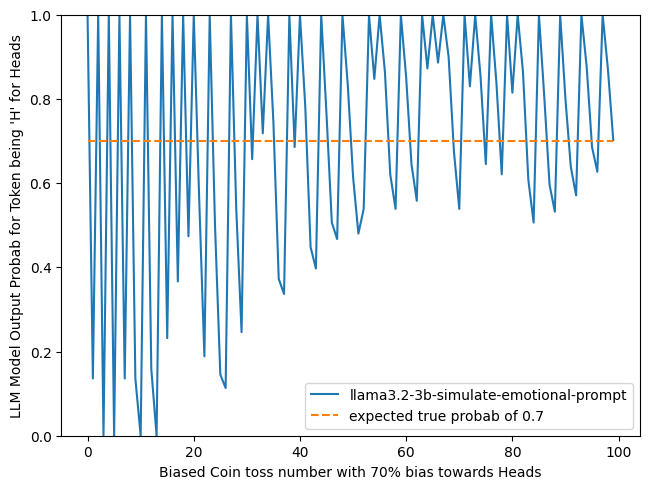

In [10]:
plt.plot(
    list(range(100)),
    normalize_heads_tails_probab(simulate_emotion),
    label="llama3.2-3b-simulate-emotional-prompt",
)

plt.plot(
    list(range(100)),
    [0.7] * len(list(range(100))),
    label="expected true probab of 0.7",
    linestyle="--",
)

plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.xlabel("Biased Coin toss number with 70% bias towards Heads")
plt.ylabel("LLM Model Output Probab for Token being 'H' for Heads")